# 3 layer LSTM WITHOUT batchnorm, dropout. 30 day input, 7 day forecast

In [1]:
import numpy as np
import pandas as pd
import json
import os
import math
import datetime as dt
import matplotlib.pyplot as plt
from numpy import newaxis
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, LSTM, CuDNNLSTM, BatchNormalization
from keras.models import Sequential, load_model
from sklearn.metrics import mean_squared_error

import utils
import model_funcs

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = [16, 9]
%matplotlib inline

Using TensorFlow backend.


In [2]:
save_dir = 'models/lstm.21'
df = pd.read_csv('data_25_normalized.csv', index_col='Date')
data = df.values

In [4]:
num_input = 120
num_out = 3
train_X, train_y, dev_X, dev_y, test_X, test_y, train_y_acc, dev_y_acc, test_y_acc = utils.prepare_data(data, num_input, num_preds=num_out)

print("train_X shape", train_X.shape)
print("train_y shape", train_y.shape)
print("dev_X shape", dev_X.shape)
print("dev_y shape", dev_y.shape)
print("test_X shape", test_X.shape)
print("test_y shape", test_y.shape)

train_X shape (568, 120, 25)
train_y shape (568, 3)
dev_X shape (71, 120, 25)
dev_y shape (71, 3)
test_X shape (72, 120, 25)
test_y shape (72, 3)


In [5]:
if not os.path.exists(save_dir): os.makedirs(save_dir)

input_shape = train_X.shape[1:]
lr = 0.001
decay = 1e-6
dropout_rate = 0.3
epochs = 200
batch_size = 32

model = Sequential()
model.add(
    CuDNNLSTM(
        128,
        input_shape=input_shape,
        return_sequences=True,
    )
)
model.add(Dropout(dropout_rate))

model.add(CuDNNLSTM(128, return_sequences=True))
model.add(Dropout(dropout_rate))

model.add(CuDNNLSTM(128))
model.add(Dropout(dropout_rate))

model.add(Dense(32, activation="relu"))
model.add(Dropout(dropout_rate))

model.add(Dense(num_out, activation="linear"))


opt = Adam(lr=lr, decay=decay)
model.compile(loss="mse", optimizer=opt)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_1 (CuDNNLSTM)     (None, 120, 128)          79360     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120, 128)          0         
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 120, 128)          132096    
_________________________________________________________________
dropout_2 (Dropout)          (None, 120, 128)          0         
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 128)               132096    
_________________________________________________________________
dropout_3 (Dropout)  

In [6]:
history = model_funcs.train(
    model,
    train_X,
    train_y,
    (dev_X, dev_y),
    epochs = epochs,
    batch_size = batch_size,
    save_dir = save_dir
)

[Model] Training Started
[Model] 200 epochs, 32 batch size
Instructions for updating:
Use tf.cast instead.
Train on 568 samples, validate on 71 samples
Epoch 1/200
568/568 [==============================] - 3s 6ms/step - loss: 0.0384 - val_loss: 0.0044
Epoch 2/200
568/568 [==============================] - 2s 3ms/step - loss: 0.0184 - val_loss: 8.4922e-04
Epoch 3/200
568/568 [==============================] - 2s 3ms/step - loss: 0.0147 - val_loss: 0.0022
Epoch 4/200
568/568 [==============================] - 2s 3ms/step - loss: 0.0125 - val_loss: 8.2132e-04
Epoch 5/200
568/568 [==============================] - 2s 3ms/step - loss: 0.0105 - val_loss: 8.8440e-04
Epoch 6/200
568/568 [==============================] - 2s 3ms/step - loss: 0.0102 - val_loss: 4.2130e-04
Epoch 7/200
568/568 [==============================] - 2s 3ms/step - loss: 0.0081 - val_loss: 5.4389e-04
Epoch 8/200
568/568 [==============================] - 2s 3ms/step - loss: 0.0110 - val_loss: 6.4930e-04
Epoch 9/200
568/

568/568 [==============================] - 1s 3ms/step - loss: 0.0027 - val_loss: 5.8559e-04
Epoch 76/200
568/568 [==============================] - 1s 3ms/step - loss: 0.0026 - val_loss: 5.9755e-04
Epoch 77/200
568/568 [==============================] - 1s 3ms/step - loss: 0.0028 - val_loss: 6.1244e-04
Epoch 78/200
568/568 [==============================] - 1s 3ms/step - loss: 0.0026 - val_loss: 9.6780e-04
Epoch 79/200
568/568 [==============================] - 1s 3ms/step - loss: 0.0027 - val_loss: 5.1193e-04
Epoch 80/200
568/568 [==============================] - 1s 3ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 81/200
568/568 [==============================] - 1s 3ms/step - loss: 0.0029 - val_loss: 1.7826e-04
Epoch 82/200
568/568 [==============================] - 1s 3ms/step - loss: 0.0027 - val_loss: 1.8560e-04
Epoch 83/200
568/568 [==============================] - 1s 3ms/step - loss: 0.0035 - val_loss: 6.8736e-04
Epoch 84/200
568/568 [==============================] - 1s 3ms/

568/568 [==============================] - 2s 3ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 154/200
568/568 [==============================] - 1s 3ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 155/200
568/568 [==============================] - 2s 3ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 156/200
568/568 [==============================] - 2s 3ms/step - loss: 0.0023 - val_loss: 8.7394e-04
Epoch 157/200
568/568 [==============================] - 2s 3ms/step - loss: 0.0026 - val_loss: 2.4240e-04
Epoch 158/200
568/568 [==============================] - 1s 3ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 159/200
568/568 [==============================] - 2s 3ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 160/200
568/568 [==============================] - 2s 3ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 161/200
568/568 [==============================] - 2s 3ms/step - loss: 0.0023 - val_loss: 7.7750e-04
Epoch 162/200
568/568 [==============================] - 2s 3ms/step - loss

190


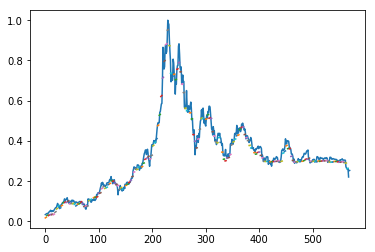

In [7]:
predicted_train = model.predict(train_X)
predicted_train = predicted_train[::num_out]
print(len(predicted_train))
true_train = train_y[:, 0].reshape(-1,1)
utils.plot_results_multiple(predicted_train.tolist(), true_train, num_out)

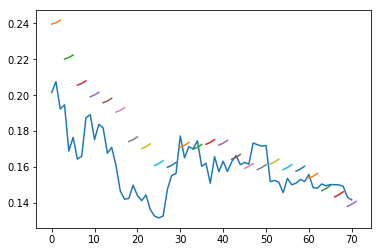

In [9]:
predicted_dev = model.predict(dev_X)
predicted_dev = predicted_dev[::num_out]
true_dev = dev_y[:, 0].reshape(-1,1)
utils.plot_results_multiple(predicted_dev.tolist(), true_dev, num_out)

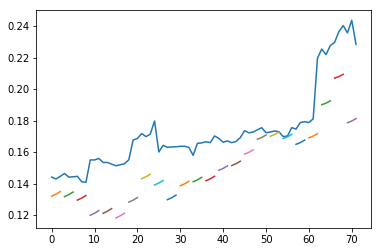

In [10]:
predicted_test = model.predict(test_X)
predicted_test = predicted_test[::num_out]
true_test = test_y[:, 0].reshape(-1,1)
utils.plot_results_multiple(predicted_test.tolist(), true_test, num_out)

In [11]:
print("MSE Train:", mean_squared_error(predicted_train.reshape(-1,1)[:len(true_train)], true_train))
print("MSE Dev:", mean_squared_error(predicted_dev.reshape(-1,1)[:len(true_dev)], true_dev))
print("MSE Test:", mean_squared_error(predicted_test.reshape(-1,1)[:len(true_test)], true_test))

MSE Train: 0.000605756135886128
MSE Dev: 0.0004839320388245489
MSE Test: 0.0006530706094798829


In [12]:
print("Acc Train:", utils.direction_accuracy(predicted_train.reshape(-1,1)[:len(true_train)], true_train))
print("Acc Dev:", utils.direction_accuracy(predicted_dev.reshape(-1,1)[:len(true_dev)], true_dev))
print("Acc Test:", utils.direction_accuracy(predicted_test.reshape(-1,1)[:len(true_test)], true_test))

Acc Train: 0.5432098765432098
Acc Dev: 0.5
Acc Test: 0.647887323943662


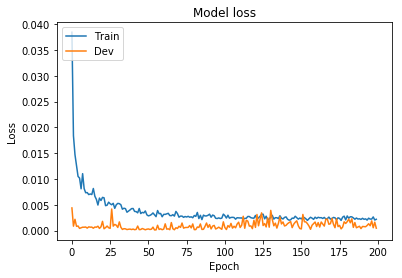

In [13]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Dev'], loc='upper left')
plt.show()